### <font color = 'red'> Class 16

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'key' : ['A','B','C','A','B','C'],
                   'data' : range(6)},columns = ['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [4]:
df_group_by = df.groupby('key')
type(df_group_by)

pandas.core.groupby.generic.DataFrameGroupBy

In [5]:
df_group_by.sum()

,data
key,
A,3
B,5
C,7


#### Time Series

In [7]:
date = pd.to_datetime('21st of April,1992 11:12:00')
date

Timestamp('1992-04-21 11:12:00')

In [8]:
date.strftime('%A')

'Tuesday'

In [9]:
pd.date_range('2014-5-9',periods = 7)

DatetimeIndex(['2014-05-09', '2014-05-10', '2014-05-11', '2014-05-12',
               '2014-05-13', '2014-05-14', '2014-05-15'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('2014-5-9',periods = 12,freq = 'h')

DatetimeIndex(['2014-05-09 00:00:00', '2014-05-09 01:00:00',
               '2014-05-09 02:00:00', '2014-05-09 03:00:00',
               '2014-05-09 04:00:00', '2014-05-09 05:00:00',
               '2014-05-09 06:00:00', '2014-05-09 07:00:00',
               '2014-05-09 08:00:00', '2014-05-09 09:00:00',
               '2014-05-09 10:00:00', '2014-05-09 11:00:00'],
              dtype='datetime64[ns]', freq='h')

In [49]:
pd.date_range('2014-5-9',periods = 7,freq = 'ME')

DatetimeIndex(['2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30'],
              dtype='datetime64[ns]', freq='ME')

In [45]:
pd.period_range('2014-5-9',periods = 7,freq = 'M')

PeriodIndex(['2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
             '2014-11'],
            dtype='period[M]')

#### Microsoft stock price

In [31]:
msft = pd.read_csv('MSFT.csv')
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-08-09,279.640015,283.079987,277.609985,282.299988,282.299988,23405200
248,2022-08-10,288.170013,289.809998,286.940002,289.160004,289.160004,24687800
249,2022-08-11,290.850006,291.209991,286.510010,287.019989,287.019989,20065900
250,2022-08-12,288.480011,291.910004,286.940002,291.910004,291.910004,22601900
251,2022-08-15,291.000000,294.179993,290.109985,293.470001,293.470001,18072100


In [33]:
msft.set_index('Date',inplace=True)
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-16,293.190002,294.820007,290.019989,294.600006,292.213959,22507600
2021-08-17,292.390015,293.429993,291.079987,293.079987,290.706207,20075300
2021-08-18,292.040009,294.820007,290.269989,290.730011,288.927338,21813000
2021-08-19,288.690002,297.470001,288.640015,296.769989,294.929871,29850500
2021-08-20,299.720001,305.839996,298.059998,304.359985,302.472809,40817600


In [37]:
msft_close = msft['Close']

In [39]:
# convert index (date) to pandas datetime type
msft_close.index = pd.to_datetime(msft_close.index)

<Axes: xlabel='Date'>

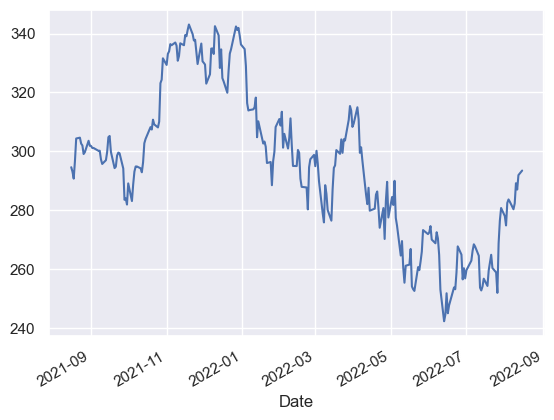

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
msft_close.plot()

#### Resampling and converting frequencies

<Axes: xlabel='Date'>

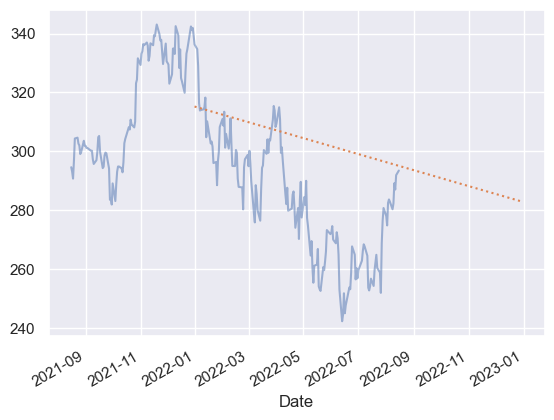

In [56]:
msft_close.plot(alpha=0.5,style='-')
msft_close.resample('BYE').mean().plot(style=':')
msft_close.asfreq('BYE').plot(style='--')